# 多尺度目标检测

In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision
import d2l.torch as d2l

In [4]:
img = torchvision.io.read_image('img/catdog.jpg')
h, w = img.shape[1:]
h, w

(561, 728)

In [5]:
def display_anchors(fmap_w, fmap_h, s):
    fmap = torch.zeros((1, 10, fmap_h, fmap_w))
    anchors = d2l.multibox_prior(fmap, sizes=s, ratios=[1, 2, 0.5]) # 生成锚框
    bbox_scale = torch.tensor((w, h, w, h))
    fig = plt.imshow(img.permute(1, 2, 0))
    d2l.show_bboxes(fig.axes, anchors[0] * bbox_scale)

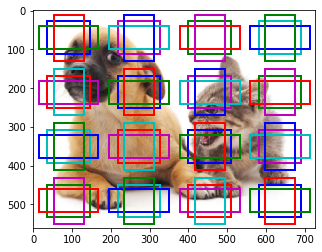

In [7]:
display_anchors(4, 4, s=[0.15]);

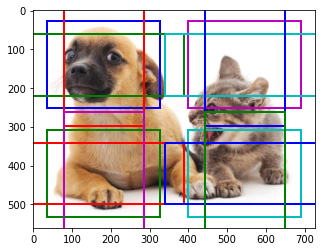

In [8]:
display_anchors(fmap_w=2, fmap_h=2, s=[0.4]);

尺度较小的往往对应较高的抽象层次, 尺度较大的则对应较小的抽象层次, 越深层、特征图尺度越小特征图上的每个位置感受野越大、非线性性越强，得到的特征映射也更加复杂抽象